# ***Colon Model***

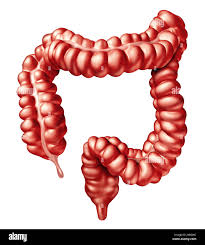

# *Import Rquired Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# *Downloading Dataset*

In [2]:
from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [3]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
 99% 1.74G/1.76G [00:22<00:00, 92.7MB/s]
100% 1.76G/1.76G [00:22<00:00, 84.1MB/s]


# *UnZipping lung-and-colon-cancer-histopathological-image*

In [4]:
!unzip lung-and-colon-cancer-histopathological-images.zip -d lung_colon_data

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_data/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lu

# Making a directory path for our Data

In [5]:
data_dir = '/content/lung_colon_data/lung_colon_image_set/colon_image_sets'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/lung_colon_data/lung_colon_image_set/colon_image_sets')

In [7]:
list(data_dir.glob('*/*.jpeg'))[:5]

[PosixPath('/content/lung_colon_data/lung_colon_image_set/colon_image_sets/colon_aca/colonca1845.jpeg'),
 PosixPath('/content/lung_colon_data/lung_colon_image_set/colon_image_sets/colon_aca/colonca2735.jpeg'),
 PosixPath('/content/lung_colon_data/lung_colon_image_set/colon_image_sets/colon_aca/colonca4369.jpeg'),
 PosixPath('/content/lung_colon_data/lung_colon_image_set/colon_image_sets/colon_aca/colonca1256.jpeg'),
 PosixPath('/content/lung_colon_data/lung_colon_image_set/colon_image_sets/colon_aca/colonca4003.jpeg')]

# *Getting The number of Images in Dataset*

In [8]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

10000


# *Listing All Colon adenocarcinoma Images*

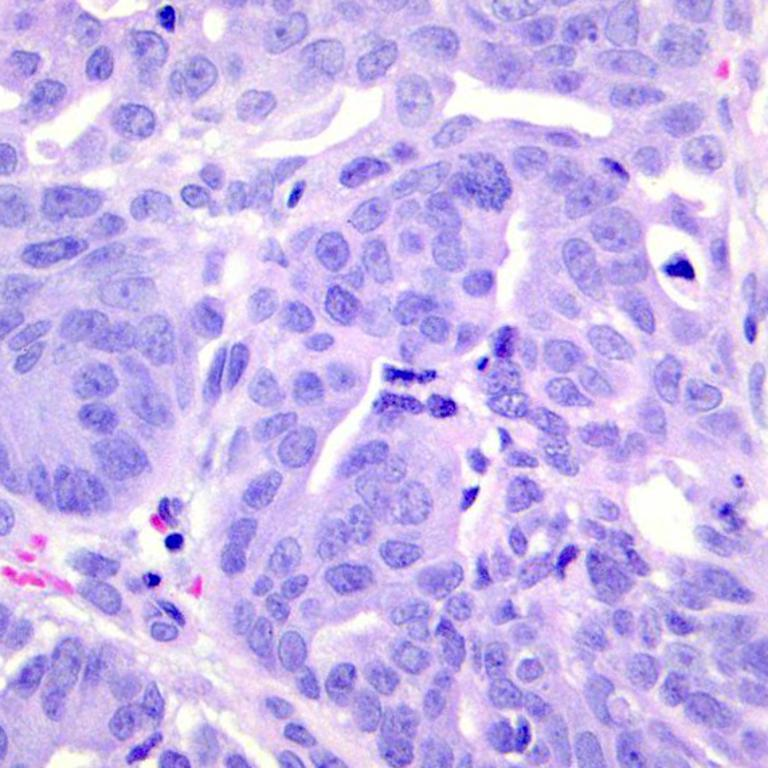

In [9]:
colon_aca = list(data_dir.glob('colon_aca/*'))
PIL.Image.open(str(colon_aca[0]))

# *Listing All Colon benign tissue Images*

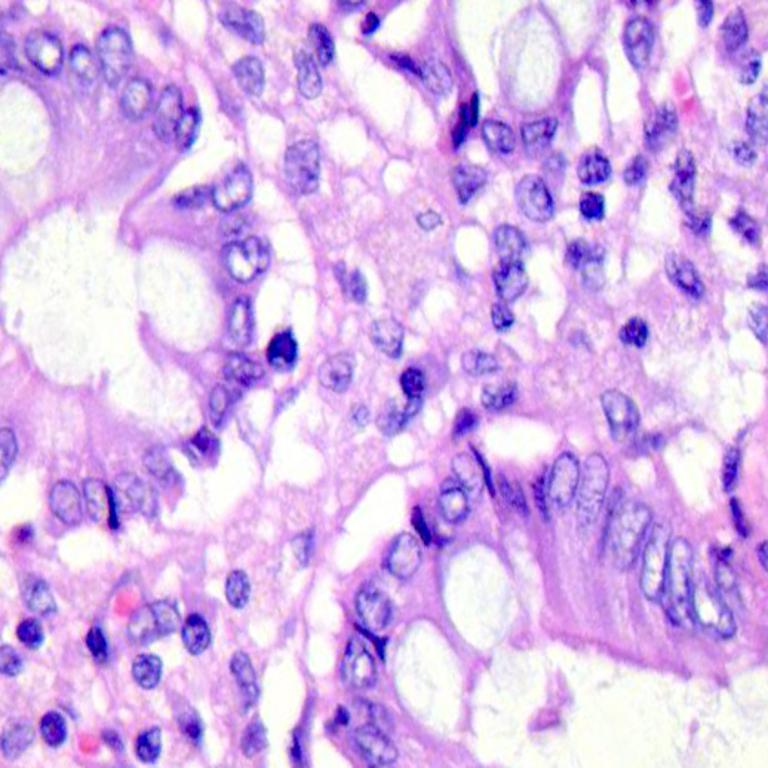

In [10]:
colon_n = list(data_dir.glob('colon_n/*'))
PIL.Image.open(str(colon_n[0]))

# *Plotting The Count of each Class*

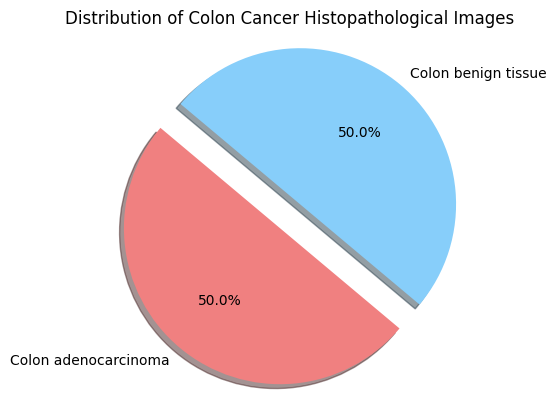

In [12]:
# Count the number of images in each class
colon_aca_count = len(list(data_dir.glob('colon_aca/*.jpeg')))
colon_n_count = len(list(data_dir.glob('colon_n/*.jpeg')))


# Create a pie chart
labels = ['Colon adenocarcinoma', 'Colon benign tissue']
sizes = [colon_aca_count, colon_n_count]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Colon Cancer Histopathological Images')
plt.show()

# *Making a dictionary for all Colon Images*

In [13]:
colon_images_dict = {
    'colon_n': list(data_dir.glob('colon_n/*')),
    'colon_aca': list(data_dir.glob('colon_aca/*')),
}

# *Making a dictionary for all Labels*

In [14]:
colon_labels_dict = {
    'colon_n': 0,
    'colon_aca': 1,
}

# *Separating The Features and Target and Resizing The Images*

In [15]:
X, y = [], []
for diagnosis, images in colon_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(80,80))
        X.append(resized_img)
        y.append(colon_labels_dict[diagnosis])

In [16]:
X = np.array(X)
y = np.array(y)

# *Splitting The Data into train and test*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

# *Normaliztion*

In [18]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# *CNN Architecture*

In [19]:
num_classes = 2

model2 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history=model2.fit(X_train_scaled, y_train,batch_size=64,validation_split=0.15 ,epochs=10)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 53s 427ms/step - accuracy: 0.5290 - loss: 0.7231 - val_accuracy: 0.7349 - val_loss: 0.5582
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 419ms/step - accuracy: 0.7399 - loss: 0.5279 - val_accuracy: 0.8604 - val_loss: 0.3496
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 49s 435ms/step - accuracy: 0.8617 - loss: 0.3222 - val_accuracy: 0.9278 - val_loss: 0.2197
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 417ms/step - accuracy: 0.9150 - loss: 0.2214 - val_accuracy: 0.9325 - val_loss: 0.1801
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 417ms/step - accuracy: 0.9386 - loss: 0.1678 - val_accuracy: 0.9678 - val_loss: 0.1139
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 444ms/step - accuracy: 0.9590 - loss: 0.1103 - val_accuracy: 0.9655 - val_loss: 0.0864
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 436ms/step - accuracy: 0.9779 - loss: 0.0652 - val_accuracy: 0.9773 - val_loss: 0.0620
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 430ms/step - accuracy: 0.9804 - loss: 0

# *Evaluating The Model*

In [20]:
model2.evaluate(X_test_scaled,y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9686 - loss: 0.0779


[0.10063369572162628, 0.9639999866485596]

# *Prediction of Model*

In [21]:
predictions = model2.predict(X_test_scaled)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


array([[2.2236409e-02, 9.7776353e-01],
       [9.9996418e-01, 3.5718662e-05],
       [9.9999911e-01, 8.4653868e-07],
       ...,
       [1.5353844e-07, 9.9999988e-01],
       [9.7062082e-05, 9.9990296e-01],
       [9.9997854e-01, 2.1403350e-05]], dtype=float32)

# *plotting random images with predicted and True Class*

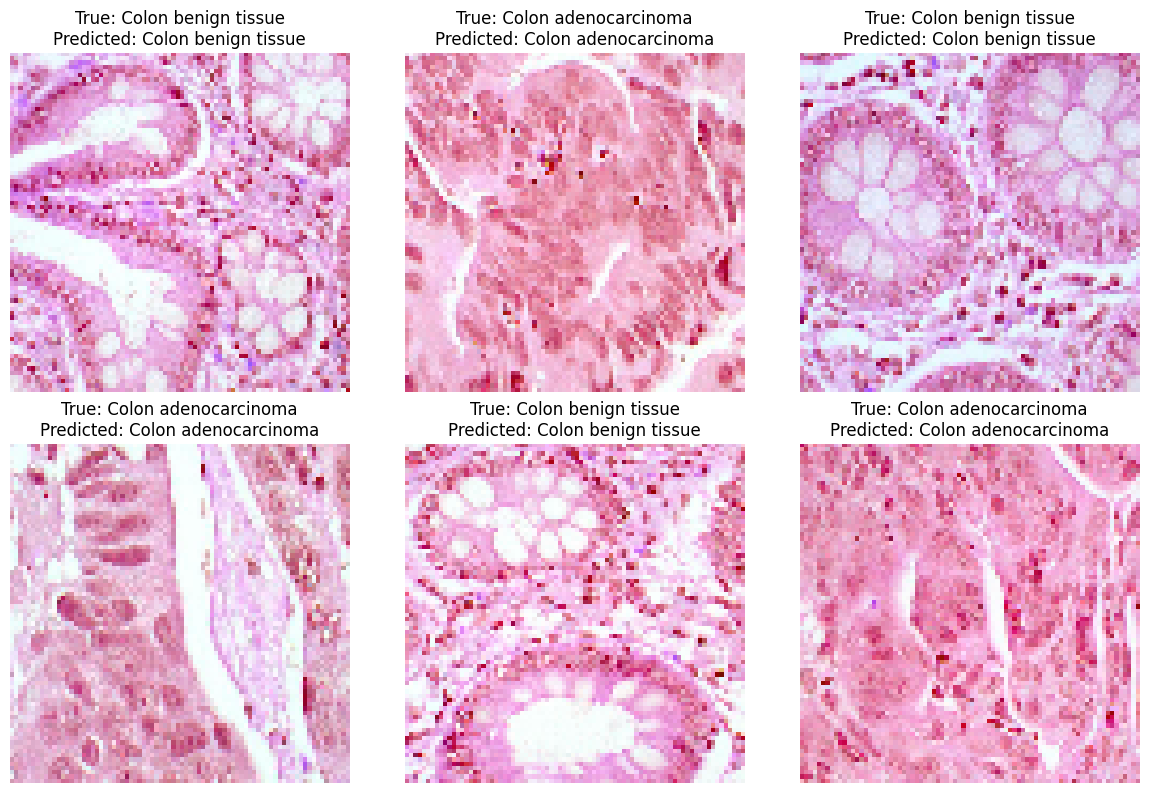

In [22]:
label_to_class = {
    0: 'Colon benign tissue',
    1: 'Colon adenocarcinoma',
}

# Select a random subset of images to display
num_images_to_display = 6
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, index in enumerate(random_indices):
    image = X_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    axes[i].imshow(image)
    axes[i].set_title(f"True: {label_to_class[true_label]}\nPredicted: {label_to_class[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Plot training & validation accuracy values

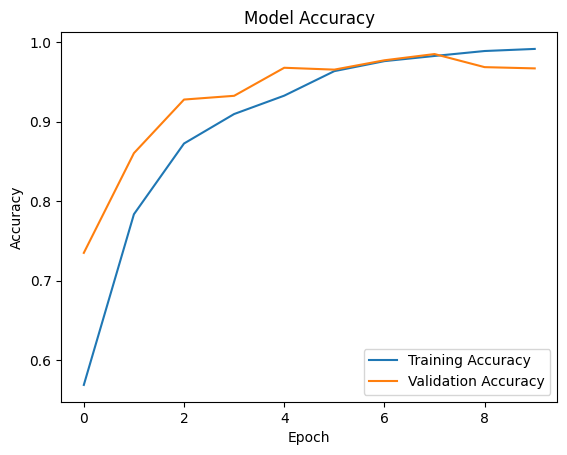

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# *Plot training & validation loss values*

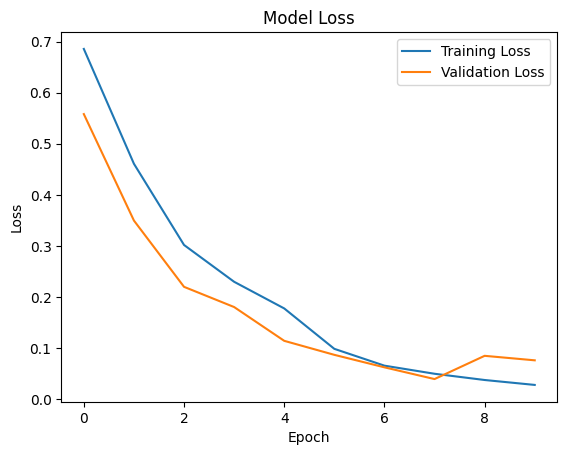

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# *Confusion Matrix*

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


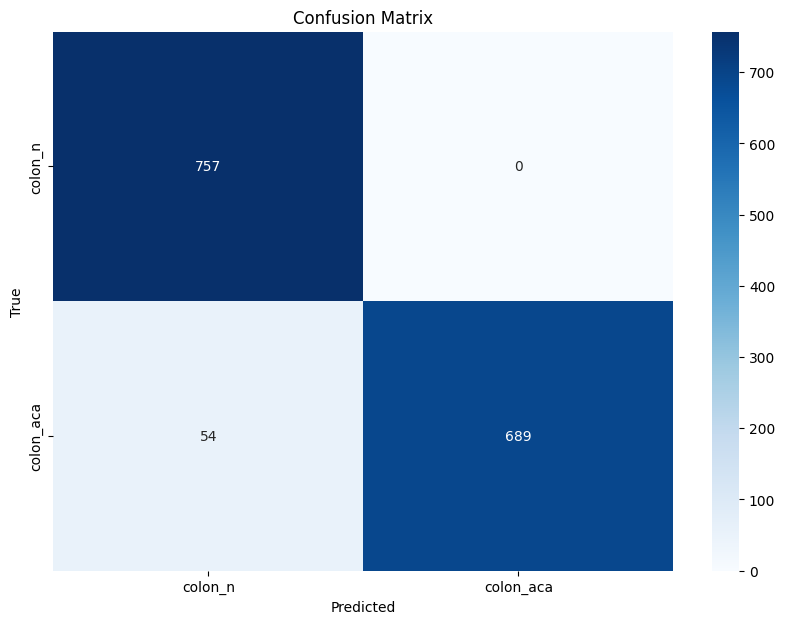

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
y_pred = np.argmax(model2.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['colon_n', 'colon_aca'],
            yticklabels=['colon_n', 'colon_aca'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# *Saving The Model*

In [26]:
model2.save('colon_model.keras')

# *Testing The Model by Uploading Images and make it Classify Them*

In [28]:
import numpy as np
import cv2
import tensorflow as tf

uploaded = files.upload()
for fn in uploaded.keys():
    path = fn
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

    img = cv2.imread(path)
    img_resized = cv2.resize(img, (80, 80))
    img_resized_scaled = img_resized / 255.0
    img_array = np.expand_dims(img_resized_scaled, axis=0)

    try:
        predictions = model2.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        predicted_class_index = np.argmax(score)
        class_names = ['colon_n', 'colon_aca']
        print(f"Prediction: {class_names[predicted_class_index]}")
    except Exception as e:
        print(f"Error during prediction: {e}")


Saving colonn4982.jpeg to colonn4982.jpeg
User uploaded file "colonn4982.jpeg" with length 96781 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: colon_n
